,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


Trainingsset: R^2 = 0.5180, MSE = 1779517.5879
Testset: R^2 = 0.5090, MSE = 1892388.9420


Extra uitwerkingen:


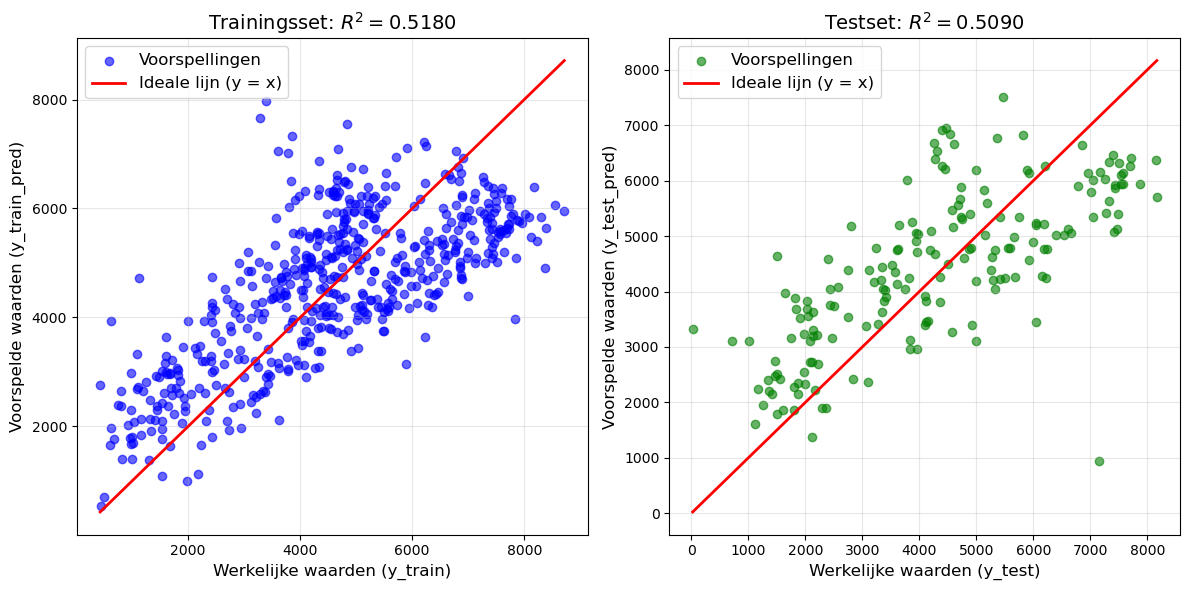

1779517.5878942523


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Stap 1: Dataset laden
data_path = 'bike_day_raw.csv'  # Zorg dat het pad correct is
bike_data = pd.read_csv(data_path)
display(bike_data.head())

# Splits de data in features (X) en target (y)
X = bike_data.drop(columns=['cnt'])  # Alle kolommen behalve 'cnt' als features
y = bike_data.cnt  # De labels

# Stap 2: Data splitsen in trainings- en testset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Stap 3: Lineair regressiemodel trainen
model = LinearRegression()
model.fit(X_train, y_train)

# Stap 4: Model evalueren
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Bereken R^2 en MSE voor zowel de trainings- als testset
r2_train = r2_score(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Resultaten afdrukken
print(f"Trainingsset: R^2 = {r2_train:.4f}, MSE = {mse_train:.4f}")
print(f"Testset: R^2 = {r2_test:.4f}, MSE = {mse_test:.4f}")


# Extra uitwerkingen om de R2 te visualiseren
print("\n\nExtra uitwerkingen:")
# Visualisatie van R^2 voor de trainingsset
plt.figure(figsize=(12, 6))

# Scatterplot voor trainingsdata
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6, color='blue', label='Voorspellingen')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', lw=2, label='Ideale lijn (y = x)')
plt.title(f"Trainingsset: $R^2 = {r2_train:.4f}$", fontsize=14)
plt.xlabel("Werkelijke waarden (y_train)", fontsize=12)
plt.ylabel("Voorspelde waarden (y_train_pred)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Scatterplot voor testdata
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6, color='green', label='Voorspellingen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Ideale lijn (y = x)')
plt.title(f"Testset: $R^2 = {r2_test:.4f}$", fontsize=14)
plt.xlabel("Werkelijke waarden (y_test)", fontsize=12)
plt.ylabel("Voorspelde waarden (y_test_pred)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Toon de visualisaties
plt.tight_layout()
plt.show()


# MSE met numpy:
MSE = np.mean(np.square(y_train - y_train_pred))
print(MSE)